In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'rc']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
random.seed(10)

### Pre-Solución

 Clases `Agente` y `Mundo` vistas en clase.
 
 Ya se modifica aquí para que solo se mueva N-S-E-O.

In [4]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion = np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
        
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion

    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.randint(0, 51), random.randint(0, 51)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [5]:
class Mundo:
    def __init__(self, agentes, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 4, 'alpha' : .6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


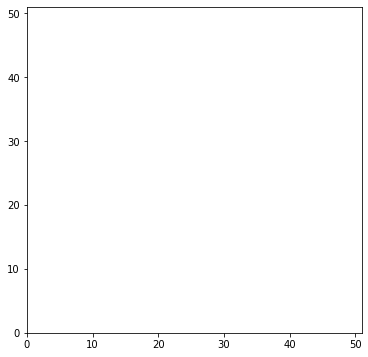

In [5]:
num_agentes = 250

agentes_simples = [Agente(tipo = 2) for i in range(num_agentes)]



sin_chiste = Mundo(agentes = agentes_simples, steps = 10)


simulacion = sin_chiste.simular()

In [6]:
HTML(simulacion.to_html5_video())

`get_coords` toma las dimeniones de la rejilla, $51x51$, y regresa un array donde cada elemento del array es una cordenada de la rejilla. 

In [6]:
def get_coords(n, m):
    """
    Hace un np.array donde cada elemento del array es el índice de una n x m rejilla
    """
    t = [[i, j] for i in range(n) for j in range(m)]
    return np.array(t)

`make_visible_coords` toma el rango de la visión del agente y regresa un array donde cada elemento del arrat es la coordenada de una casilla visible para el agente. 

Recordemos que los movimientos son Norte-Sur-Este-Oeste

In [7]:
def make_possible_coords(vision):
    """
    Calcula los posibles movimientos de los agentes dependiendo de su visión
    """
    def make_mov(punto):
        mov = np.array([[-punto, 0] , [punto, 0], [0, -punto], [0, punto]])
        return mov
                     
    movimientos = [make_mov(mov) for mov in range(1, vision+1)]
    return np.vstack(movimientos)

### Sugarscape

In [ ]:
class Bien:
    
    def __init__ (self, x = 51, y = 51, growth_rate = 1, num_agents = 100):
        self.x = x
        self.y = y
        self.growth_rate = growth_rate
        self.sugar_limit = random.randint(0,5)
        self.num_agents = num_agents
        self.agent_count = []
        self.list = []
        self.make_sugar()
        self.make_agents()
    
    def make_sugar(self):
        
        self.coords = get_coords(self.x, self.y)
        np.random.shuffle(self.coords)
        
        for i in range(len(self.coords)):
            self.matriz_azucar = self.list.append([random.randint(0,5)])
            
        self.azucar_regada = np.append(self, [[self.matriz_azucar]], axis = 1)
        
        
    def make_agents(self):
        
        # Hacemos a TODOS los agentes
        self.positions = np.array([self.coords[i] for i in range(self.num_agentes)])
        self.agentes = np.array([[self.position[i], self.vision, self.metabolism] for i in range(self.num_agents)])
        self.ocupadas = np.array([i for i in self.positions])
        self.vacias = np.array([i for i in self.positions if i not in self.ocupadas]) 
        
        
    def look_and_move(self, position, vision):
        
        self.locs = make_possible_coords(self.vision)
        self.visible_locs = self.locs + self.position
        self.vacias = np.array([i for i in self.positions if i not in self.ocupadas])    
    
        if len(self.vacias) == 0:
            return self.position
        
        self.locs_azucar = [self.visible_locs[i][2] for i in range(len(self.visible_locs))]
        self.place = np.argmax(self.locs_azucar)
        
        return self.locs_azucar[i]
    
    
    def step(self):

        for agente in self.agentes:
            
            self.ocupadas.remove(habitante.loc)
            habitante.actuar(self)

            if habitante.starving() or habitante.dying():
                self.agentes.remove(agente)
                if replace:
                    self.add_agent()
            else:
                self.occupied.add(habitante.loc)


        self.agent_count.append(len(self.agentes))
        

In [ ]:
class Habitante():
    
    def __init__(self, tipo, age = 0):
        Agente.__init__(self, tipo)
        self.metabolismo = random.uniform(1,4)
        self.vision = random.randint(1,6)
        self.life = random.randint(0,20)
        self.age = 0
    
    def actuar(self):
        self.loc = bien.look_and_move(self.bien.agentes[0], self.vision)
        self.age += 1
    
    def dying(self):
        return self.age > self.life   
    
    def starving(self):
        return self.sugar < 0


In [129]:
class Bien():
    
    def __init__ (self, x = 51, y = 51, growth_rate = 1, max_azucar = 5):
        self.x = x
        self.y = y
        self.growth_rate = growth_rate
        self.sugar_limit = random.randint(0,5)
        self.list = []
    
    def make_sugar(self):
        
        self.coords = get_coords(self.x, self.y)
        np.random.shuffle(self.coords)
        
        for i in range(len(self.coords)):
            self.matriz_azucar = self.list.append([random.randint(0,5)])
            
        self.azucar_regada = np.append(self, [[self.matriz_azucar]], axis = 1)
        self.lugares_ocupados = []

In [131]:
class Habitante(Agente):
    
    def __init__(self, tipo, num_agentes, x = 52, y = 52):
        Agente.__init__(self, tipo)
        self.metabolismo = random.uniform(1,4)
        self.vision = random.randint(1,6)
        self.x = x
        self.y = y
        self.num_agentes = num_agentes
        self.make_agents()
    
    def make_agents(self):
        
        # Hacemos a TODOS los agentes
        self.position = np.array([self.bien.coords[i] for i in range(self.num_agentes)])
        self.agentes = np.array([[self.position[i], self.vision, self.metabolism] for i in range(self.num_agents)])
        self.ocupadas = np.array([i for i in self.positions])
        self.vacias = np.array([i for i in self.positions if i not in self.ocupadas])    
        
    def look_and_move(self, position, vision):
        
        self.locs = make_possible_coords(self.vision)
        self.visible_locs = self.locs + self.position
        self.vacias = np.array([i for i in self.positions if i not in self.ocupadas])    
    
        if len(self.vacias) == 0:
            return self.position
        
        self.locs_azucar = [self.visible_locs[i][2] for i in range(len(self.visible_locs))]
        self.place = np.argmax(self.locs_azucar)
        
        return self.locs_azucar[i]
    
    
    def actuar(self, agentes):
        self.locacion = np.array([random.uniform(0, 51), random.uniform(0, 51)]) # Brinco a una nueva posición
        
    def decision(self, agentes):
        """Verdadero si un número suficiente de vecinos cercanos es del mismo tipo."""
        distancias = []
        # Distancias es una lista de pares (distancia, agente)
        for agente in agentes:
            if self != agente:
                distancia = self.distancia(agente)
                distancias.append((distancia, agente))
        # Ordenamos del más cercano al más lejano 
        distancias.sort()
        vecinos = [agente for dist, agente in distancias[:self.vecinos]]
        # Contamos cuantos vecinos son del mismo tipo 
        num_mismo_tipo = sum(self.tipo == agente.tipo for agente in vecinos)
        
        self.feliz = (num_mismo_tipo >= self.homofilia)
        
        return self.feliz



In [ ]:
class Habitante(Agente):
    
    def __init__(self, localizacion, num_agentes, x = 52, y = 52):
        Agente.__init__(self, tipo)
        self.metabolismo = random.uniform(1,4)
        self.vision = random.randint(1,6)
        self.x = x
        self.y = y
        self.num_agentes = num_agentes
        self.make_agents()
    
    def make_agents(self):
        
        self.position = np.array([self.bien.coords[i] for i in range(self.num_agentes)])
        self.ocupadas = np.array([i for i in self.positions])
        self.vacias = np.array([i for i in self.positions if i not in self.ocupadas])    
        self.agentes = np.array([[self.position[i], self.vision, self.metabolism] for i in range(self.num_agents)])
        
    def decision(self, vision, agentes):
        self.locs = make_possible_coords(self.vision)
        self.visible_locs = (self.locs + self.position)

    
        if len(self.empty) == 0:
            return self.position
        
        self.locs_azucar = [self.visible_locs[i][2] for i in range(len(self.visible_locs))]
        self.place = np.argmax(self.locs_azucar)
        
        return self.locs_azucar[i]
    
    def dying(self):
        return self.age > self.life        
    
    def actuar(self, agentes):
        
    def actualizar(self, agentes):
        """Si no está feliz, escoge una posición nueva al azar, sólo se detiene cuando está feliz."""
        self.decision(agentes)
        if not self.feliz:
            self.actuar(agentes) # No estaba feliz en la ultima ronda
            

In [ ]:
class Sugarscape(Mundo):
    
    def __init__(self, num_agentes, ancho = 6, alto = 6, steps = 100):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 4, 'alpha' : 0.6}
        self.puntos_0 = self.ax.plot([], [], 'o', markerfacecolor='blue', **plot_args)

    def dibujar_agentes(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            for i in self.locs:
            x = agente.locs[i][0]
            y = agente.locs[i][1]
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos
    
    def dibujar_azúcar(self, azucar)
            x_values_1, y_values_1 = [], []
            for agente in self.agentes:
            for i in self.locs:
                x = agente.locs[i][0]
                y = agente.locs[i][1]
                x_values_0.append(x)
                y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        self.ax.set_title('Paso {}'.format(step))
    
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim